Importing necessary libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

Loading and visualizing time series data

In [59]:
# Import data
df = pd.read_csv('weatherAUsS.csv', delimiter=';')
#df = pd.read_csv('weatherAUsS.csv', delimiter=';', parse_dates=['Date'] , index_col=['Date'])

df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTodayNum
0,12/01/2008,Albury,13.4,22.9,0.6,44,20,24,71,22,1007.7,1007.1,16.9,21.8,No,1
1,12/02/2008,Albury,7.4,25.1,0.0,44,4,22,44,25,1010.6,1007.8,17.2,24.3,No,1
2,12/03/2008,Albury,12.9,25.7,0.0,46,19,26,38,30,1007.6,1008.7,21.0,23.2,No,1
3,12/04/2008,Albury,9.2,28.0,0.0,24,11,9,45,16,1017.6,1012.8,18.1,26.5,No,1
4,12/05/2008,Albury,17.5,32.3,1.0,41,7,20,82,33,1010.8,1006.0,17.8,29.7,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,6/21/2017,Albury,1.2,15.2,0.4,15,0,2,100,62,1029.4,1026.7,2.9,14.3,No,1
3036,6/22/2017,Albury,0.8,13.4,0.0,17,6,0,100,66,1029.4,1025.9,3.6,13.3,No,1
3037,6/23/2017,Albury,1.1,11.9,0.0,44,9,2,100,81,1022.3,1017.7,2.7,10.2,No,1
3038,6/24/2017,Albury,1.1,14.1,0.2,28,4,15,100,49,1018.8,1017.2,3.9,13.1,No,1


<Axes: >

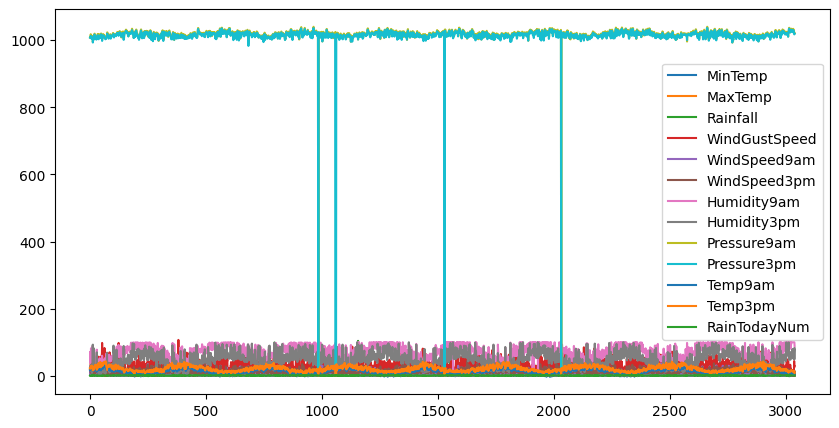

In [60]:
df.plot(figsize=(10,5))

In [61]:
df['RainToday'] = df['RainToday'].map({'No': 1, 'Yes':2})
df.drop(['Location', 'Date'], axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3040 non-null   float64
 1   MaxTemp        3040 non-null   float64
 2   Rainfall       3040 non-null   float64
 3   WindGustSpeed  3040 non-null   int64  
 4   WindSpeed9am   3040 non-null   int64  
 5   WindSpeed3pm   3040 non-null   int64  
 6   Humidity9am    3040 non-null   int64  
 7   Humidity3pm    3040 non-null   int64  
 8   Pressure9am    3040 non-null   float64
 9   Pressure3pm    3040 non-null   float64
 10  Temp9am        3040 non-null   float64
 11  Temp3pm        3040 non-null   float64
 12  RainToday      3040 non-null   int64  
 13  RainTodayNum   3040 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 332.6 KB


In [63]:
# 1 Option
# mask = (df.index < len(df) - 20)

# df_train = df[mask].copy()
# df_test = df[~mask].copy()

# print('data train :', df_train.shape, 'data test:', df_test.shape)



# 2 Option
# train_size = int(0.8 * len(df['RainToday']))  # Hitung 80% dari jumlah total data

# df_train = df['RainToday'].iloc[:train_size].copy()
# df_test = df['RainToday'].iloc[train_size:].copy()

# print('data train :', df_train.shape, 'data test:', df_test.shape)

Check Stationary

#1 Time Series Plot

#2 ACF and PACF plot

[]

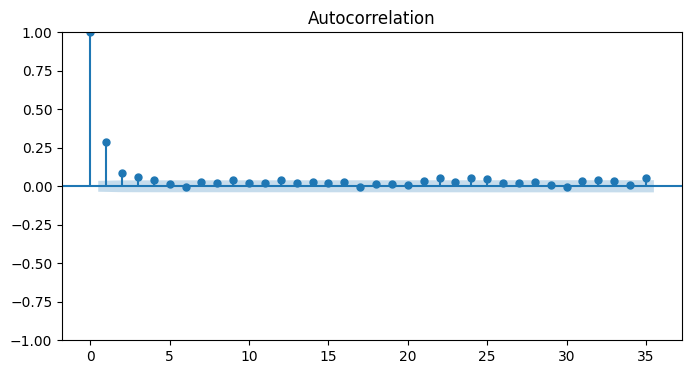

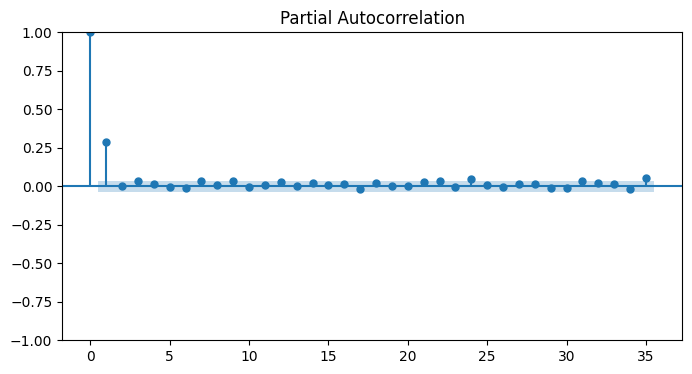

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = df['RainToday']

plot_acf(data)
plot_pacf(data)

plt.plot()

In [65]:
mask = (data.index < len(data) - 30)

df_train = data[mask].copy()
df_test = data[~mask].copy()

print('data train :', df_train.shape, 'data test:', df_test.shape)

data train : (3010,) data test: (30,)


#3 ADF Test

In [66]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_train)
print('ADF Statistic: %f' % result[0])
print('P-value:', result[1])

# Since P-value is greater than the ( 0.05 ) significance level, let’s difference the series and see how the autocorrelation plot looks like.

ADF Statistic: -27.040976
P-value: 0.0


Transform to Stationary ( Differencing )

In [67]:
# df_train_diff = data.diff().dropna()

# df_train_diff.plot(figsize=(12, 6))

In [68]:
# plot_acf(df_train_diff)
# plot_pacf(df_train_diff)

# plt.plot()

In [69]:
# # ADF Test after differencing

# result = adfuller(df_train_diff)
# print('ADF Statistic: %f' % result[0])
# print('P-value: ', result[1])

# # the P-value after differencing is less than 0.05, so the data is stationary.
# # if the P-value still show non-stationary / bigger than significance level, we can differencing again.

Determine ARIMA Models

In [70]:
# If the PACF plot has a significant spike at lag p, but not beyond; the ACF plot decays more gradually. This may suggest an ARIMA(p, d, 0) model.

# If the ACF plot has a significant spike at lag q, but not beyond; the PACF plot decays more gradually. This may suggest an ARIMA(O, d, q) model.

Fit ARIMA Models

In [71]:
import statsmodels.api as sm

# ARIMA Model
model = sm.tsa.arima.ARIMA(df_train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              RainToday   No. Observations:                 3010
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1406.039
Date:                Fri, 14 Mar 2025   AIC                           2818.079
Time:                        13:53:00   BIC                           2836.107
Sample:                             0   HQIC                          2824.562
                               - 3010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2733      0.015     17.891      0.000       0.243       0.303
ma.L1         -0.9856      0.003   -324.104      0.000      -0.992      -0.980
sigma2         0.1489      0.004     41.505      0.0

Make Time Series Predictions

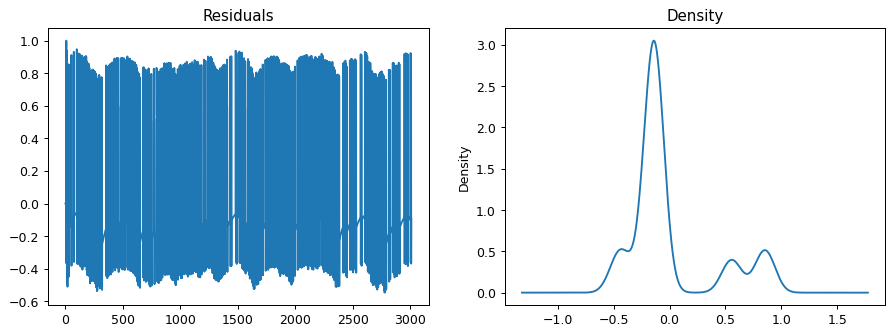

In [72]:
plt.rcParams.update({'figure.figsize': (12, 4), 'figure.dpi': 90})

residuals = model_fit.resid[1:]

fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

[]

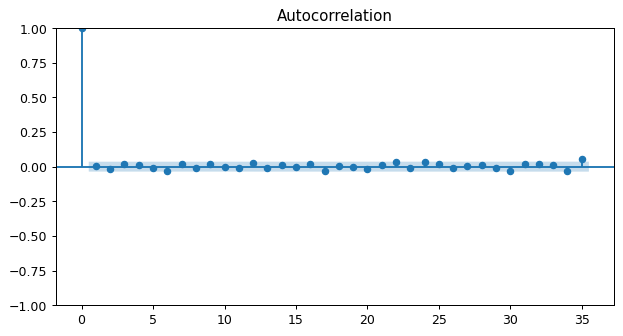

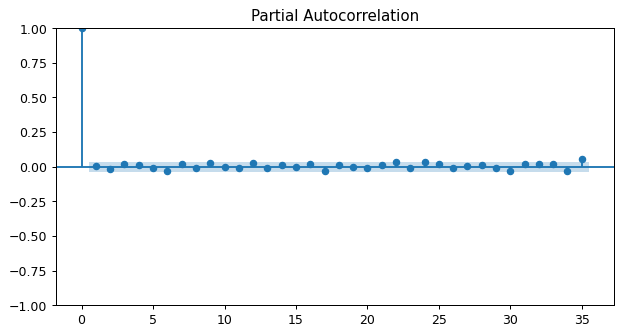

In [73]:
plt.rcParams.update({'figure.figsize': (8, 4), 'figure.dpi': 90})

plot_acf(residuals)
plot_pacf(residuals)

plt.plot()

<Axes: >

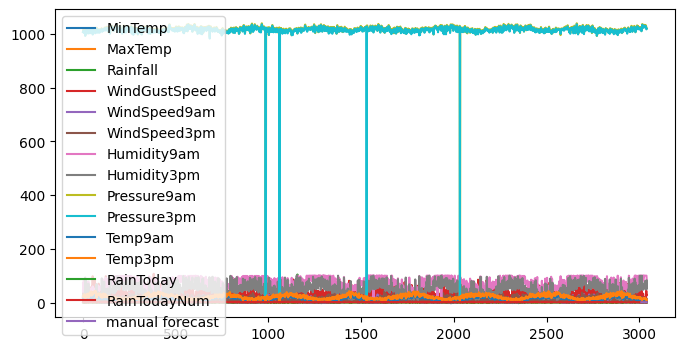

In [74]:
plt.rcParams.update({'figure.figsize': (8, 4), 'figure.dpi': 100})

forecast = model_fit.forecast(len(df_test))

df['manual forecast'] = [None] * len(df_train) + list(forecast)

df.plot()

Using Auto ARIMA model

In [75]:
import pmdarima as pm
auto_arima = pm.auto_arima(data, trace=True, surpress_warnings=True, stepwise=False, seasonal=False)
auto_arima

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10074.786, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7565.244, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=6378.817, Time=0.47 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5734.252, Time=0.57 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=5298.286, Time=0.89 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=4947.432, Time=1.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4058.622, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3053.740, Time=0.96 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2853.765, Time=1.78 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2848.281, Time=2.88 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2847.993, Time=3.58 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3699.539, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2844.743, Time=1.85 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2846.484, Time=2.49 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=4.14 sec
 ARIMA(3,0,0)(

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [76]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3040
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1418.372
Date:                Fri, 14 Mar 2025   AIC                           2844.743
Time:                        13:53:37   BIC                           2868.822
Sample:                             0   HQIC                          2853.398
                               - 3040                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2724      0.016     78.361      0.000       1.241       1.304
ar.L2         -0.2724      0.016    -16.750      0.000      -0.304      -0.241
ma.L1         -0.9858      0.003   -320.861      0.0

In [77]:
x = df.drop('RainToday', axis=1)
y = df['RainToday']

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [79]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

(3040, 15)
(3020,) (20,)


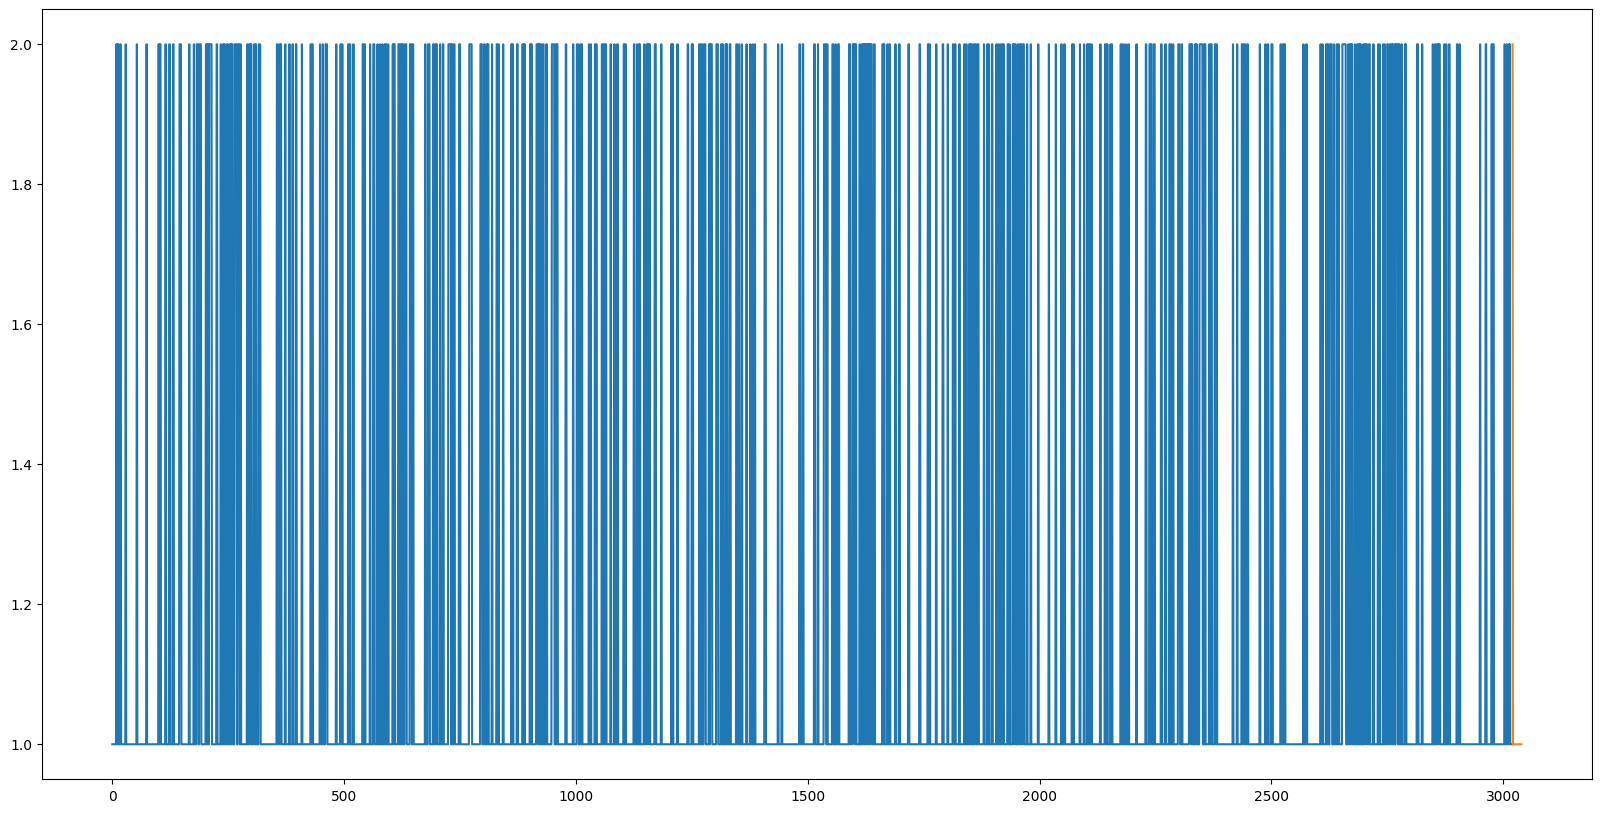

In [80]:
series = df['RainToday']
train, test = series[:-20], series[-20:]
n = len(df)
n_train = len(train)
n_test = len(test)

print(df.shape)
fig, ax = plt.subplots(figsize=(20, 10))
train.plot(ax=ax)
test.plot(ax=ax)
print(train.shape, test.shape)

Evaluate Model Prediction

<Axes: >

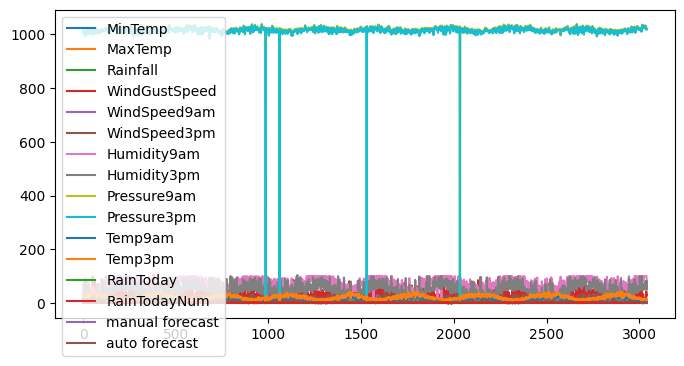

In [81]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['auto forecast'] = [None] * len(df_train) + list(forecast_test_auto)

df.plot()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(df_test, forecast)
mse = mean_squared_error(df_test, forecast)
mape = mean_absolute_percentage_error(df_test, forecast)

print('MAE: ', mae)
print('MSE: ', mse)
print('MAPE: ', mape)

MAE:  0.22197280066584135
MSE:  0.1161392703239872
MAPE:  0.16323550842206794


In [83]:
mae_auto = mean_absolute_error(df_test, forecast_test_auto)
mse_auto = mean_squared_error(df_test, forecast_test_auto)
mape_auto = mean_absolute_percentage_error(df_test, forecast_test_auto)

print('MAE auto: ', mae_auto)
print('MSE auto: ', mse_auto)
print('MAPE auto: ', mape_auto)

MAE auto:  0.21844429071329866
MSE auto:  0.11619367089307234
MAPE auto:  0.1594154096499131
